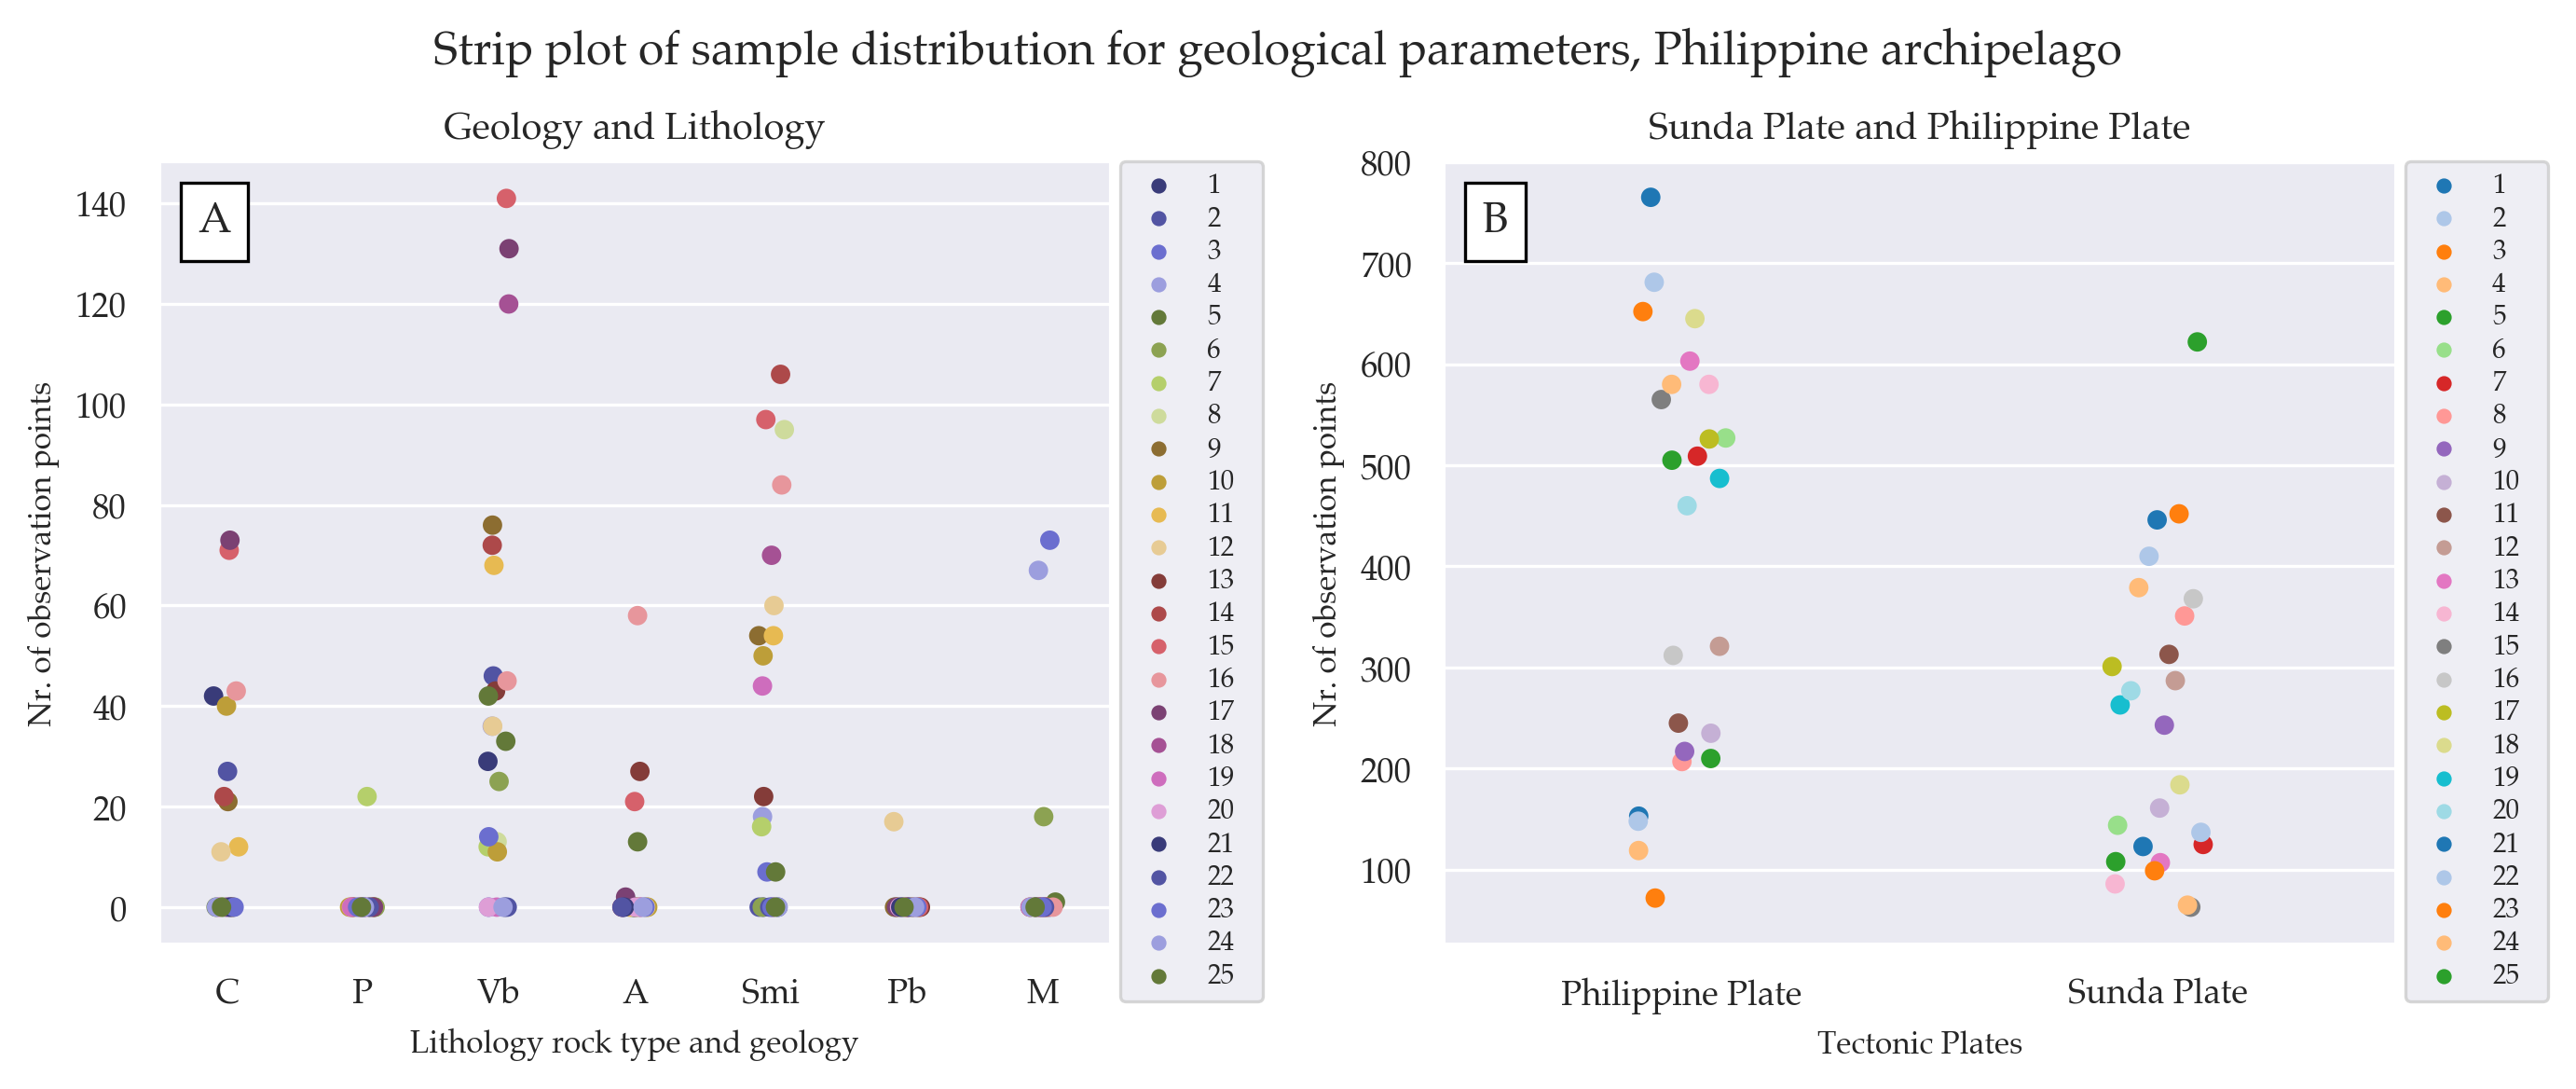

In [19]:
#!/usr/bin/env python
# coding: utf-8
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as pylab
from matplotlib import pyplot as plt
import matplotlib.artist as martist
from matplotlib.offsetbox import AnchoredText
import seaborn as sb

os.chdir('/Users/pauline/Documents/Python')
dfM = pd.read_csv("Tab-GeomorphPhil.csv")
sb.set_style('darkgrid')
sb.set_context('paper')

df1 = dfM.melt(id_vars=['profile'], 
              value_vars=['geol_c', 'geol_p', 'geol_vb', 
                          'geol_a', 'geol_smi', 'geol_pb', 'geol_m'],
              var_name='Geology', value_name='Nr. of observation points'
              )
df2 = dfM.melt(id_vars=['profile'], 
              value_vars=['plate_phil', 'plate_sunda'],
              var_name='Plates', value_name='Nr. of observation points'
              )

params = {'legend.fontsize': 7,
          'figure.figsize': (10, 5),
          'axes.labelsize': 8,
          'font.family': 'Palatino'
         }
pylab.rcParams.update(params)

fig = plt.figure(figsize=(10.0, 4.0), dpi=300)
fig.suptitle('Strip plot of sample distribution for geological parameters, \
Philippine archipelago', fontsize=12, x=0.5, y=0.97)


def add_at(ax, t, loc=2):
    fp = dict(size=11)
    _at = AnchoredText(t, loc=loc, prop=fp)
    ax.add_artist(_at)
    return _at

# subplot 1
ax = fig.add_subplot(121)
sb.stripplot(x='Geology', y='Nr. of observation points', 
             hue = 'profile', palette='tab20b', data=df1, jitter=True)
plt.title('Geology and Lithology')
plt.legend(bbox_to_anchor=(1.01, 0.01, 0.15, 0.99), 
           loc="upper right", ncol=1, mode="expand",
           borderaxespad=0., markerscale=.4, labelspacing=.2)
plt.xlabel('Lithology rock type and geology')
plt.xticks(np.arange(7), ('C', 'P', 'Vb', 'A', 'Smi', 'Pb', 'M'))
add_at(ax, "A")

# subplot 2
ax = fig.add_subplot(122)
sb.stripplot(x='Plates', y='Nr. of observation points', 
             hue = 'profile', palette='tab20', data=df2, jitter=True)
plt.title('Sunda Plate and Philippine Plate')
plt.legend(bbox_to_anchor=(1.01, 0.01, 0.15, 0.99), 
           loc="upper right", ncol=1, mode="expand",
           borderaxespad=0., markerscale=.4, labelspacing=.2)
plt.xlabel('Tectonic Plates')
plt.xticks(np.arange(2), ('Philippine Plate', 'Sunda Plate'))
add_at(ax, "B")

# visualization
plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.15,
                    left=0.10, right=0.90,
                    hspace=0.25, wspace=0.35
                    )
fig.savefig('plot_StripPhil.png', dpi=300)
plt.show()